In [15]:
import pandas as pd
import numpy as np
from expelliarmus import Wizard
from pathlib import Path

In [16]:
df1 = pd.read_csv('../csv_data/backscatter_10ms.csv', header=None, names=['x','y','p','t'])

In [17]:
df1['t'] = df1['t'] - df1['t'].min() # start time at 0
#convert to seconds
df1['t'] = df1['t'] / 1000000

In [18]:
counts = df1.groupby(['x','y']).size().reset_index(name='counts')

most_common_pair = counts.sort_values('counts', ascending=False)

In [19]:
most_common_pair

,x,y,counts
308673,884,458,4451
133952,396,93,2087
419865,1193,162,1973
352950,1010,61,674
443344,1256,171,630
...,...,...,...
192142,565,529,1
192139,565,525,1
192137,565,522,1
192136,565,521,1


In [20]:
df_pixel = df1[(df1['x']==most_common_pair.iloc[10]['x']) & (df1['y']==most_common_pair.iloc[10]['y'])].sort_values('t')
df_pixel.reset_index(inplace=True, drop=True)
df_pixel

,x,y,p,t
0,2,701,0,0.005390
1,2,701,1,0.005587
2,2,701,0,0.184202
3,2,701,1,0.184871
4,2,701,0,0.190761
...,...,...,...,...
248,2,701,0,6.228625
249,2,701,1,6.229966
250,2,701,1,6.252583
251,2,701,0,6.307785


<Axes: xlabel='t'>

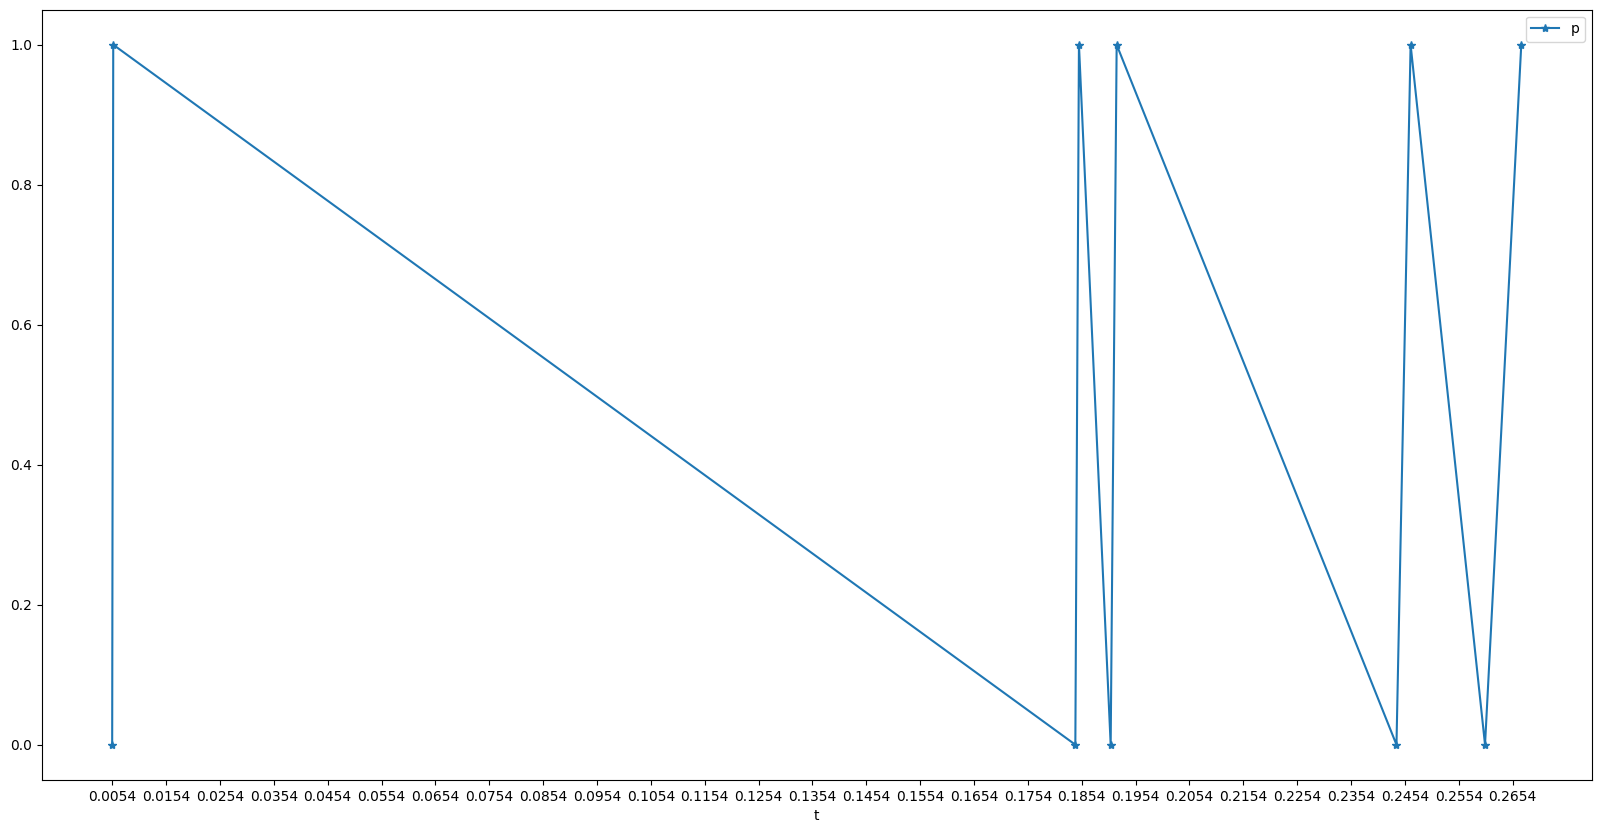

In [22]:
df_pixel[0:10].plot(x='t', y='p', kind='line', marker='*', xticks=np.arange(df_pixel[0:10]['t'].min(), df_pixel[0:10]['t'].max(), 0.01),figsize=(20,10))

First event encoded as (t, x, y, p): (7492271, 810, 436, 1)
Number of events: 139172.
Recording duration: 20.581345 s.


<Axes: xlabel='t'>

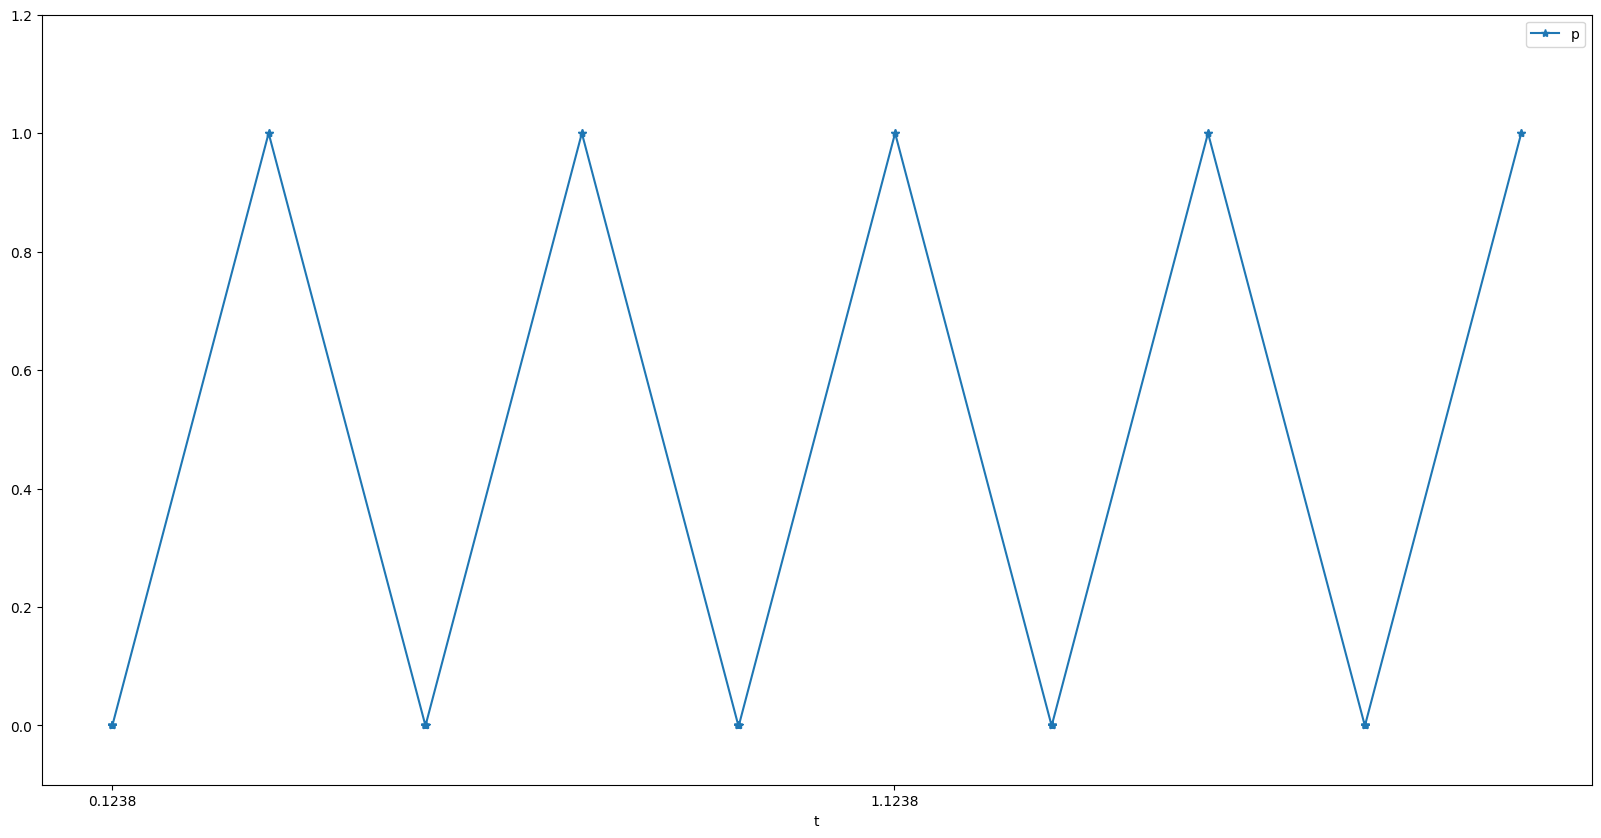

In [4]:

# wiz = Wizard(encoding='evt3', time_window=1000000)
# fpath = Path('../data/direct1secbiasroi.raw')

# wiz.set_file(fpath)
# arr = wiz.read()
# print(f"First event encoded as (t, x, y, p): {arr[0]}")
# print(f"Number of events: {len(arr)}.")
# print(f"Recording duration: {(arr[-1][0]-arr[0][0])/int(1e6)} s.")
# arr
# df = pd.DataFrame(arr, columns=['t','x','y','p'])
# df['t'] = df['t'] - df['t'].min() # start time at 0
# #convert to milliseconds
# df['t'] = df['t'] / 10000000
# df
# counts = df.groupby(['x','y']).size().reset_index(name='counts')

# most_common_pair = counts.sort_values('counts', ascending=False)
# most_common_pair
# df_pixel = df[(df['x']==most_common_pair.iloc[10]['x']) & (df['y']==most_common_pair.iloc[10]['y'])].sort_values('t')
# # df_pixel = df[(df['x']==722) & (df['y']==366)].sort_values('t')
# df_pixel.reset_index(inplace=True, drop=True)
# df_pixel
# df_pixel[0:100].plot(x='t', y='p', kind='line', marker='*',figsize=(20,10), xticks=np.arange(df_pixel['t'].min(), df_pixel['t'].max(), 1), ylim=(-0.1,1.2))